# Optimización Bayesiana

**Teorema de Bayes**

$$ P(A|B) = \frac{P(B|A) P(A)}{P(B)} $$

$ P(A|B) $: Probabilidad condicional de A dado B. También conocida como la probabilidad posterior de A dado que B ocurre.

$ P(B|A) $: Probabilidad condicional de B dado A. Se interpreta como la verosimilitud (*likelihood*) de A.

$ P(A) $: Probabilidad de observar A. También conocida como probabilidad a priori.

$ P(B) $: Probabilidad de observar B. Interpretada como evidencia.

Utilizando las definiciones de arriba actualizamos la definición del teorema de bayes:

$$ \text{posterior} = \frac{(\text{verosimilitud})(\text{anterior})}{\text{evidencia}} $$

La intuición es que el teorema de Bayes es una herramienta para actualizar nuestras creencias dado lo que se tenía antes y nueva evidencia. Por ejemplo, tomas una moneda y asumes que es una moneda justa, dado que es lo más probable y que las monedas suelen ser justas en tu experiencia. Lanzas la moneda tres veces y cae sello las tres veces; un poco extraño, así que ajustas tus creencias y empiezas a imaginar que la moneda no es tan justa como debería ser. Lanzas las monedas tres veces y cae águila; ahora crees que la moneda es justa de nuevo.

## ¿Cómo aplicamos esto en nuestra vida diaria?

Imagina que tienes 3 puntos (conocimiento previo) en un espacio.

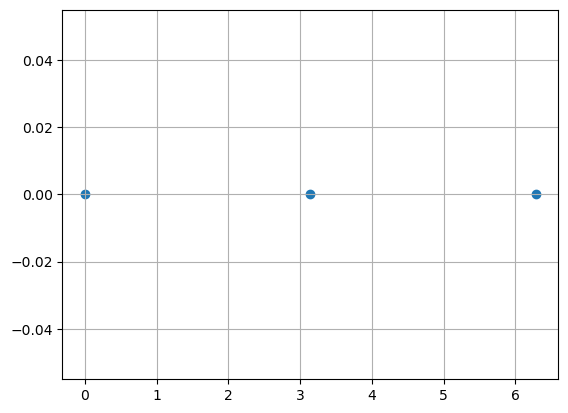

In [83]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(); plt.scatter([0, np.pi, 2*np.pi], [0, 0, 0]); plt.grid()

No hay seguridad de cómo se conectan estos puntos, pero sabes que están conectados. Hay infinitas formas en las que estos puntos se pueden conectar.

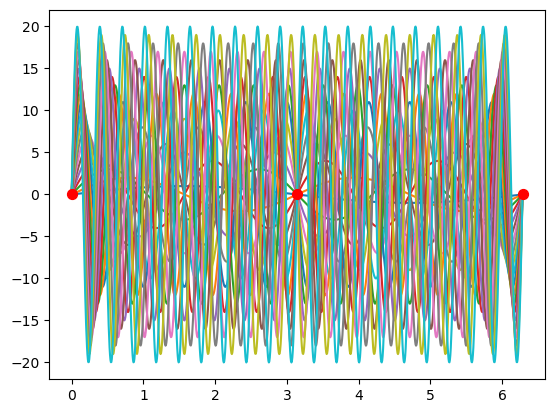

In [84]:
x = np.linspace(0, 2*np.pi, 1000); plt.figure(); 
for i in range(20) :
    y = (i+1)*np.sin((i+1)*x); plt.plot(x, y)
plt.scatter([0, np.pi, 2*np.pi], [0, 0, 0], s=50, c="r", zorder=3)

Hay tanta incertidumbre que decides pedir más información y te dan otro punto.

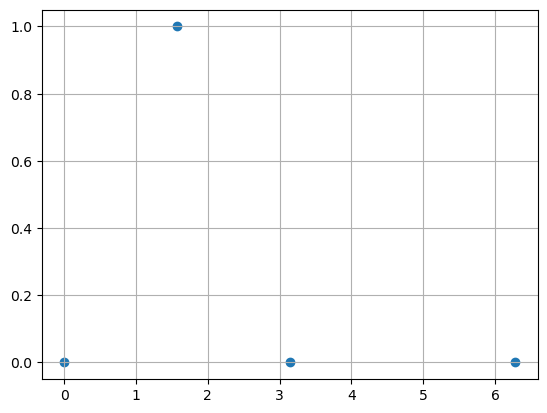

In [85]:
plt.figure(); plt.scatter([0, np.pi, 2*np.pi, np.pi/2], [0, 0, 0, 1]); plt.grid()

Con esta nueva información actualizas tus creencias y reduces la cantidad de formas en las que se conectan estos puntos (siguen siendo infinitas).

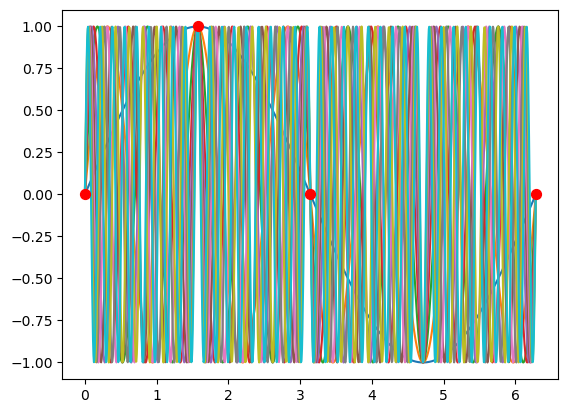

In [86]:
x = np.linspace(0, 2*np.pi, 1000); plt.figure(); 
for i in range(10) :
    y = np.sin((4*i+1)*x); plt.plot(x, y)
plt.scatter([0, np.pi, 2*np.pi, np.pi/2], [0, 0, 0, 1], s=50, c="r", zorder=3)

Te pones a pensar: "Sí. Teóricamente hay infinitas funciones que pueden conectar estos puntos, pero sólo algunas tienen sentido dado mi contexto."

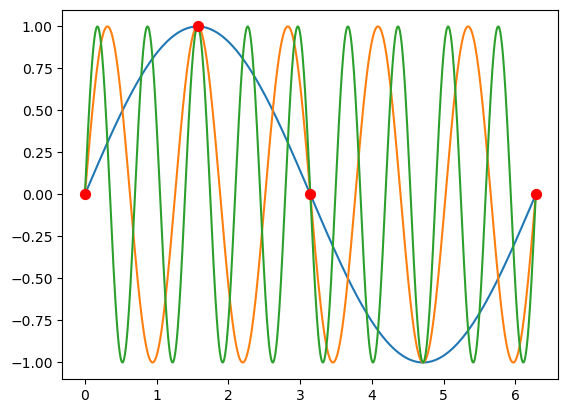

In [87]:
x = np.linspace(0, 2*np.pi, 1000); plt.figure(); 
for i in range(3) :
    y = np.sin((4*i+1)*x); plt.plot(x, y)
plt.scatter([0, np.pi, 2*np.pi, np.pi/2], [0, 0, 0, 1], s=50, c="r", zorder=3)

Ahora sólo quedan algunos pocos candidatos dado el criterio que tienes. Hay incertidumbre sobre cuál de estos candidatos podría ser el que mejor se ajusta, así que decides pedir más información. ¿Qué información serviría más?
- Se podría pedir el valor de $y$ cuando $x=\frac{3\pi}{2}$, pero los candidatos que tenemos todos pasan por el mismo punto. Incluso si nos dieran la información, no ayudaría de mucho.
- Se podría pedir fuera del rango que tenemos, pero quizás la información no existe o dado el contexto del problema es imposible que estos puntos existan.

Nos asignan nuestro último punto.

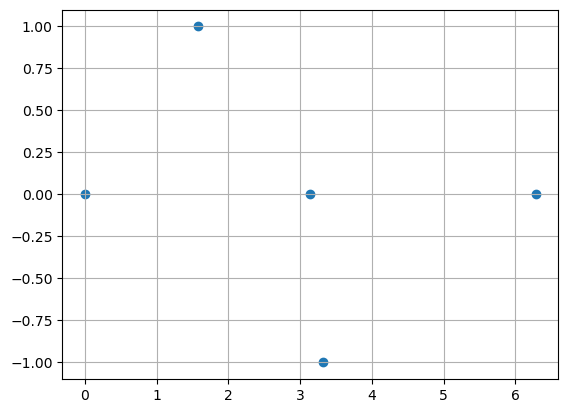

In [88]:
plt.figure(); plt.scatter([0, np.pi, 2*np.pi, np.pi/2, 19*np.pi/18], [0, 0, 0, 1, -1]); plt.grid()

Usamos esta nueva información (evidencia) junto con lo que conocíamos (anterior) y lo que creemos que es posible (verosimilitud) para decidir sobre una nueva función (posterior).

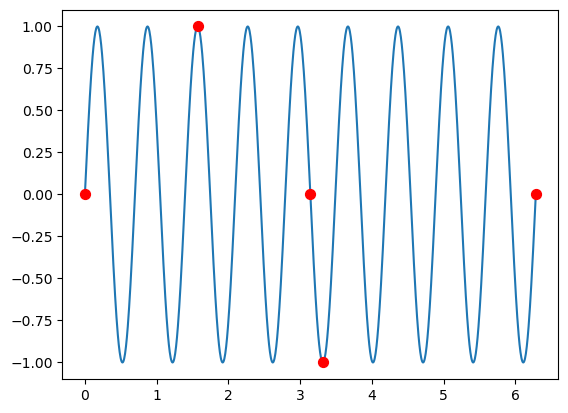

In [89]:
x = np.linspace(0, 2*np.pi, 1000); plt.figure(); y = np.sin(9*x); plt.plot(x, y)
plt.scatter([0, np.pi, 2*np.pi, np.pi/2, 19*np.pi/18], [0, 0, 0, 1, -1], s=50, c="r", zorder=3)

Una forma de realizar este experimento es mediante un proceso gaussiano, que asume que la variable de salida es una variable aleatoria con distribución normal multivariada. Utilicemos la función que encontramos y asumamos que no sabemos cuál es.

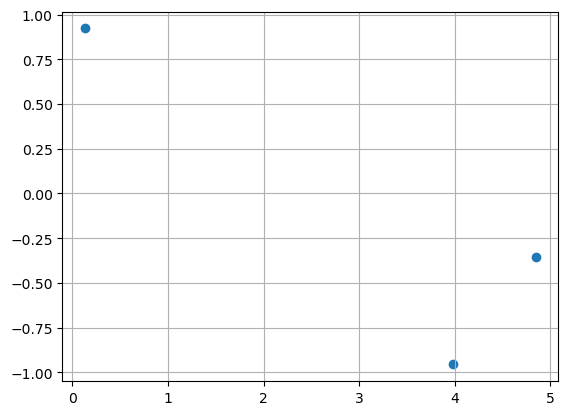

In [90]:
np.random.seed(10)
def f(x):
    return np.sin(9*x)
X = np.random.uniform(0, 2*np.pi, 3).reshape([-1, 1])
plt.figure(); plt.scatter(X, f(X)); plt.grid()

Realizamos una regresión de proceso gaussiano para encontrar distribuciones que podrían darnos estas muestras

In [91]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [72]:
kernel = 1.0*RBF(length_scale = 1)
gp = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer=10)
y = f(X)
gp.fit(X, y)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10)

Creamos un vector de valores posibles de $x$ y predecimos $y$ usando el resultado de la regresión.

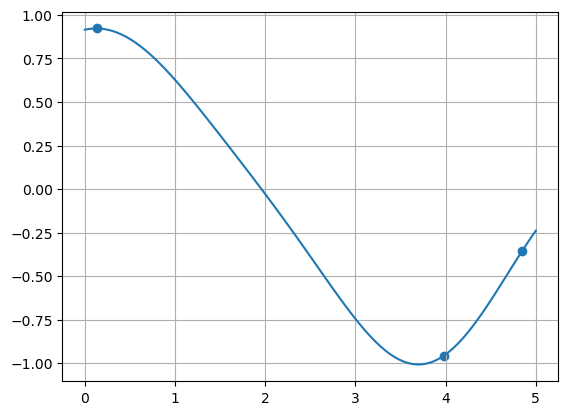

In [73]:
x_v = np.linspace(0, 5, 100).reshape(-1, 1)
y_pred = gp.predict(x_v)

#Graficar
plt.figure(); plt.scatter(X, f(X)); plt.grid()
plt.plot(x_v, y_pred)

Graficamos nuestra primera propuesta, utilizando el error estándar para dibujar nuestros intervalos de confianza.

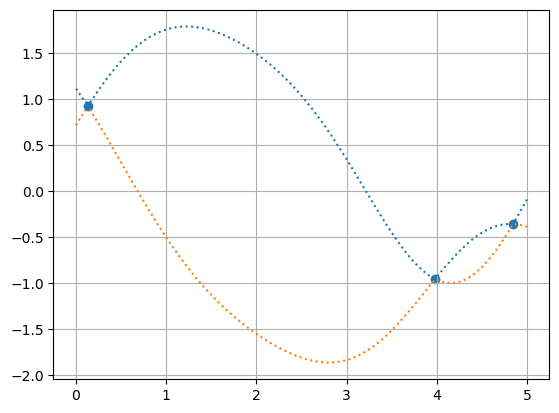

In [74]:
y_pred, std = gp.predict(x_v, return_std = True)

y_upper = y_pred + 1.96*std
y_lower = y_pred - 1.96*std

plt.figure(); plt.scatter(X, f(X)); plt.grid()
plt.plot(x_v, y_upper,  ls=":")
plt.plot(x_v, y_lower,  ls=":")

Podemos ver que necesitamos más muestras debido a que hay mucha incertidumbre en algunas partes de nuestro dominio. Hay varios criterios para decidir cómo pedir muestras:
- Maximizar (busco mi predicción del máximo actual y pido esa medida)
- Minimizar (busco mi predicción del mínimo actual y pido esa medida)
- Reducir incertidumbre (busco el punto donde mi intervalo de confianza es más grande y pido esa medida)

In [75]:
indice_std = np.argmax(std)

# Valor de x correspondiente
x_max_std = x_v[indice_std][0]

# Valor de la desviación y de la predicción en ese punto
max_std = std[indice_std]
y_at_max_std = y_pred[indice_std]
x_max_std

1.9696969696969697

In [76]:
y_max = f(x_max_std)
y_max

-0.9010928428753818

In [77]:
X = np.vstack([X, x_max_std])
y = np.vstack((y.reshape(-1,1), y_max))

Y repetimos el proceso ya con nueva información.

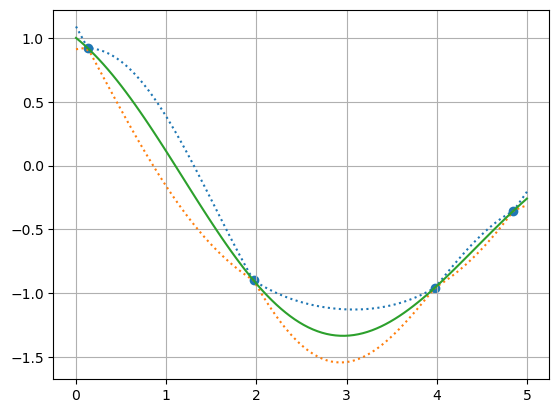

In [78]:
gp.fit(X, y)
y_pred_new, std_new = gp.predict(x_v, return_std = True)

y_upper = y_pred_new + 1.96*std_new
y_lower = y_pred_new - 1.96*std_new

plt.figure(); plt.scatter(X, f(X)); plt.grid()
plt.plot(x_v, y_upper,  ls=":")
plt.plot(x_v, y_lower,  ls=":")
plt.plot(x_v, y_pred_new)

Repitamos el proceso 30 veces con una función distinta.

$$ f(x) = \sin{(\frac{x}{3})} + \cos{(2x)},\ \ \ \ x \in [-5\pi, 5\pi] $$

C:\Users\Admin\Documents\Programas\ANACONDA\N\Lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


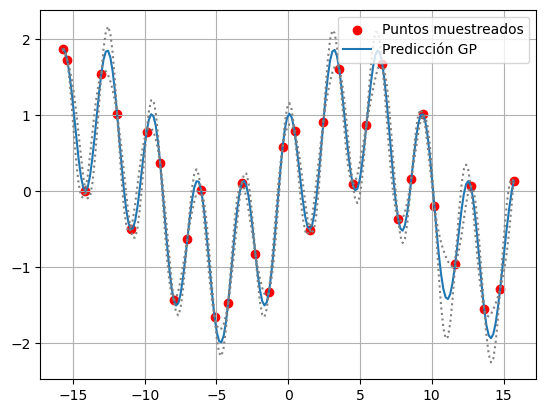

In [79]:
np.random.seed(14)

# Definimos nuestra función
def f(x):
    return np.sin(x/3) + np.cos(2*x)

# Rango del problema
x_v = np.linspace(-5*np.pi, 5*np.pi, 200).reshape(-1, 1)

# Puntos iniciales
X = np.random.uniform(-5*np.pi, 5*np.pi, 3).reshape([-1, 1])
y = f(X)

# kernel y GP
kernel = 1.0 * RBF(length_scale=1)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Bucle de 30 iteraciones
for i in range(30):
    gp.fit(X, y)
    y_pred, std = gp.predict(x_v, return_std=True)

    # Encuentra el punto con mayor incertidumbre
    indice_std = np.argmax(std)
    x_max_std = x_v[indice_std][0]
    y_max = f(x_max_std)

    # Agrega el nuevo punto
    X = np.vstack([X, x_max_std])
    y = np.vstack((y.reshape(-1, 1), y_max))

# Predicción final
gp.fit(X, y)
y_pred_final, std_final = gp.predict(x_v, return_std=True)

# Intervalo de confianza
y_upper = y_pred_final + 1.96*std_final
y_lower = y_pred_final - 1.96*std_final

# Graficar resultado final
plt.figure()
plt.scatter(X, f(X), color='red', label='Puntos muestreados')
plt.plot(x_v, y_pred_final, label='Predicción GP')
plt.plot(x_v, y_upper, ls=":", color='gray')
plt.plot(x_v, y_lower, ls=":", color='gray')
plt.grid()
plt.legend()
plt.show()


### Actividad

1. Modificar el comportamiento de selección para elegir el máximo de las predicciones como el siguiente punto.

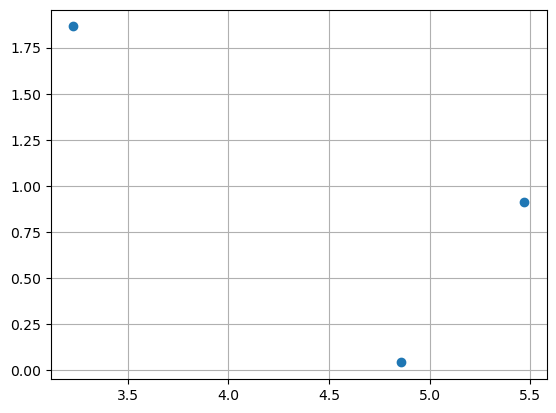

In [100]:
np.random.seed(14)

# Definimos nuestra función
def f(x):
    return np.sin(x/3) + np.cos(2*x)

X = np.random.uniform(0, 2*np.pi, 3).reshape([-1, 1])
plt.figure(); plt.scatter(X, f(X)); plt.grid()

In [101]:
kernel = 1.0*RBF(length_scale = 1)
gp = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer=10)
y = f(X)
gp.fit(X, y)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10)

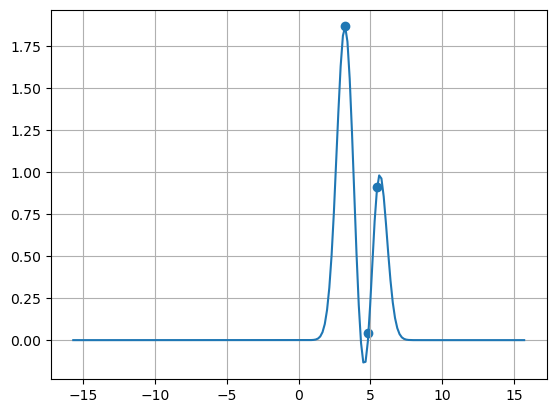

In [106]:
x_v = np.linspace(-5*np.pi, 5*np.pi, 200).reshape(-1, 1)
y_pred = gp.predict(x_v)

#Graficar
plt.figure(); plt.scatter(X, f(X)); plt.grid()
plt.plot(x_v, y_pred)

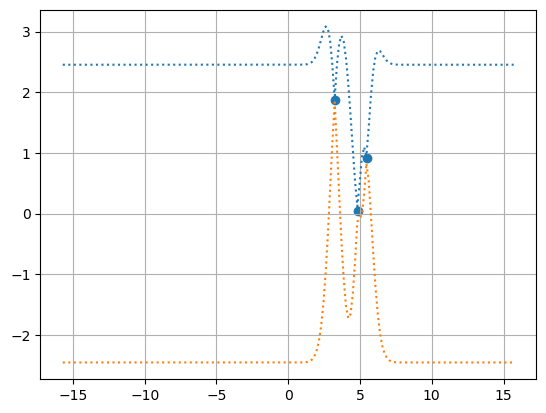

In [107]:
y_pred, std = gp.predict(x_v, return_std = True)

y_upper = y_pred + 1.96*std
y_lower = y_pred - 1.96*std

plt.figure(); plt.scatter(X, f(X)); plt.grid()
plt.plot(x_v, y_upper,  ls=":")
plt.plot(x_v, y_lower,  ls=":")

In [109]:
indice_pred = np.argmax(y_pred)

# Valor de x correspondiente
x_max_pred = x_v[indice_pred][0]

# Valor de la desviación y de la predicción en ese punto
max_pred = y_pred[indice_pred]
y_at_max_pred = y_pred[indice_pred]
x_max_pred

3.236314040130189

In [110]:
y_max = f(x_max_pred)
y_max

1.8634873621035686

In [111]:
X = np.vstack([X, x_max_pred])
y = np.vstack((y.reshape(-1,1), y_max))

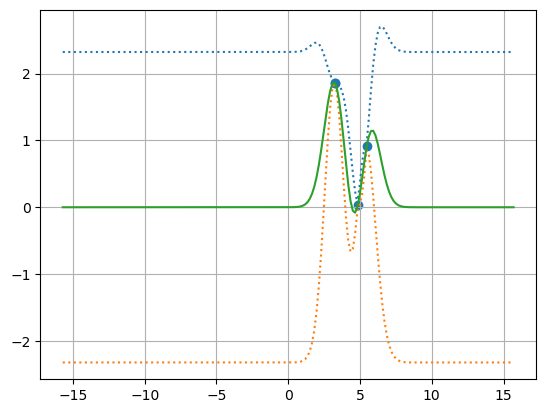

In [112]:
gp.fit(X, y)
y_pred_new, std_new = gp.predict(x_v, return_std = True)

y_upper = y_pred_new + 1.96*std_new
y_lower = y_pred_new - 1.96*std_new

plt.figure(); plt.scatter(X, f(X)); plt.grid()
plt.plot(x_v, y_upper,  ls=":")
plt.plot(x_v, y_lower,  ls=":")
plt.plot(x_v, y_pred_new)

In [ ]:
np.random.seed(14)

# Definimos nuestra función
def f(x):
    return np.sin(x/3) + np.cos(2*x)

X = np.random.uniform(0, 2*np.pi, 3).reshape([-1, 1])
plt.figure(); plt.scatter(X, f(X)); plt.grid()

kernel = 1.0*RBF(length_scale = 1)
gp = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer=10)
y = f(X)
gp.fit(X, y)

x_v = np.linspace(-5*np.pi, 5*np.pi, 200).reshape(-1, 1)
y_pred = gp.predict(x_v)

#Graficar
plt.figure(); plt.scatter(X, f(X)); plt.grid()
plt.plot(x_v, y_pred)

y_pred, std = gp.predict(x_v, return_std = True)

y_upper = y_pred + 1.96*std
y_lower = y_pred - 1.96*std

plt.figure(); plt.scatter(X, f(X)); plt.grid()
plt.plot(x_v, y_upper,  ls=":")
plt.plot(x_v, y_lower,  ls=":")

indice_pred = np.argmax(y_pred)

# Valor de x correspondiente
x_max_pred = x_v[indice_pred][0]

# Valor de la desviación y de la predicción en ese punto
max_pred = y_pred[indice_pred]
y_at_max_pred = y_pred[indice_pred]
y_max = f(x_max_pred)
X = np.vstack([X, x_max_pred])
y = np.vstack((y.reshape(-1,1), y_max))


gp.fit(X, y)
y_pred_new, std_new = gp.predict(x_v, return_std = True)

y_upper = y_pred_new + 1.96*std_new
y_lower = y_pred_new - 1.96*std_new

plt.figure(); plt.scatter(X, f(X)); plt.grid()
plt.plot(x_v, y_upper,  ls=":")
plt.plot(x_v, y_lower,  ls=":")
plt.plot(x_v, y_pred_new)

C:\Users\Admin\Documents\Programas\ANACONDA\N\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\Documents\Programas\ANACONDA\N\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\Documents\Programas\ANACONDA\N\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the da

C:\Users\Admin\Documents\Programas\ANACONDA\N\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\Documents\Programas\ANACONDA\N\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


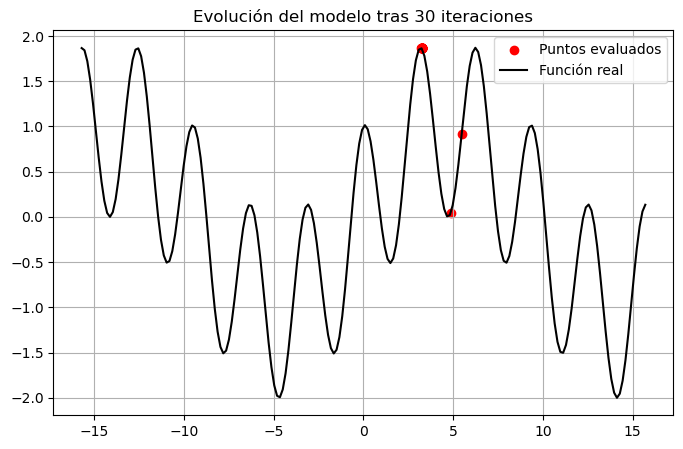

In [118]:
np.random.seed(14)

# Definimos nuestra función objetivo
def f(x):
    return np.sin(x/3) + np.cos(2*x)

# Datos iniciales
X = np.random.uniform(0, 2*np.pi, 3).reshape(-1, 1)
y = f(X)

# Definición del kernel y modelo
kernel = 1.0 * RBF(length_scale=1)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Rango de valores donde se evaluará la función
x_v = np.linspace(-5*np.pi, 5*np.pi, 200).reshape(-1, 1)

# Ciclo de 30 iteraciones
for i in range(30):
    # Entrenamos el modelo
    gp.fit(X, y)
    
    # Predicción en todo el rango
    y_pred, std = gp.predict(x_v, return_std=True)
    
    # Encontramos el punto con la predicción más alta
    indice_pred = np.argmax(y_pred)
    x_max_pred = x_v[indice_pred][0]
    
    # Calculamos el valor real en ese punto
    y_max = f(x_max_pred)
    
    # Agregamos el nuevo punto al conjunto de entrenamiento
    X = np.vstack([X, [[x_max_pred]]])
    y = np.vstack([y, [[y_max]]])

# Gráfico final
plt.figure(figsize=(8,5))
plt.scatter(X, y, color="red", label="Puntos evaluados")
plt.plot(x_v, f(x_v), color="black", label="Función real")
plt.grid(True)
plt.legend()
plt.title("Evolución del modelo tras 30 iteraciones")
plt.show()

C:\Users\Admin\Documents\Programas\ANACONDA\N\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\Documents\Programas\ANACONDA\N\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\Documents\Programas\ANACONDA\N\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the da

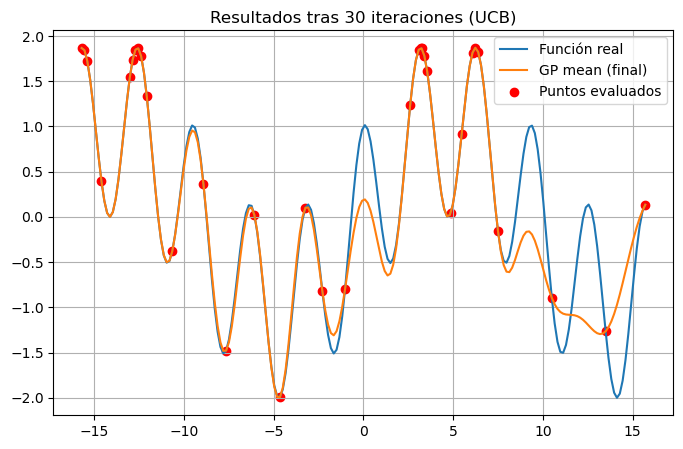

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

np.random.seed(14)

def f(x):
    return np.sin(x/3) + np.cos(2*x)

# datos iniciales
X = np.random.uniform(0, 2*np.pi, 3).reshape(-1, 1)
y = f(X)

kernel = 1.0 * RBF(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-10)

x_v = np.linspace(-5*np.pi, 5*np.pi, 200).reshape(-1, 1)

kappa = 1.96  # mayor -> más exploración
tol = 1e-6

for i in range(30):
    gp.fit(X, y.ravel())
    mu, std = gp.predict(x_v, return_std=True)
    ucb = mu + kappa * std

    # ordenar índices por UCB descendente y elegir el primero no duplicado
    sorted_idx = np.argsort(ucb)[::-1]
    chosen_idx = None
    for idx in sorted_idx:
        x_cand = x_v[idx, 0]
        # comprobar duplicados (en X)
        if not np.any(np.isclose(X.ravel(), x_cand, atol=tol)):
            chosen_idx = idx
            break
    if chosen_idx is None:
        # Si todos son duplicados (muy improbable), romper
        print("No hay candidato distinto. Rompiendo.")
        break

    x_max_pred = x_v[chosen_idx, 0]
    y_max = f(x_max_pred)

    # apilar nuevo punto
    X = np.vstack([X, [[x_max_pred]]])
    y = np.vstack([y, [[y_max]]])

# gráfico final
plt.figure(figsize=(8,5))
plt.plot(x_v, f(x_v), label="Función real")
plt.plot(x_v, gp.predict(x_v), label="GP mean (final)")
plt.scatter(X, y, color="red", label="Puntos evaluados")
plt.grid(True); plt.legend(); plt.title("Resultados tras 30 iteraciones (UCB)")
plt.show()


2. Modificar el comportamiento de selección para elegir el mínimo de las predicciones como el siguiente punto.

C:\Users\Admin\Documents\Programas\ANACONDA\N\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\Documents\Programas\ANACONDA\N\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\Documents\Programas\ANACONDA\N\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the da

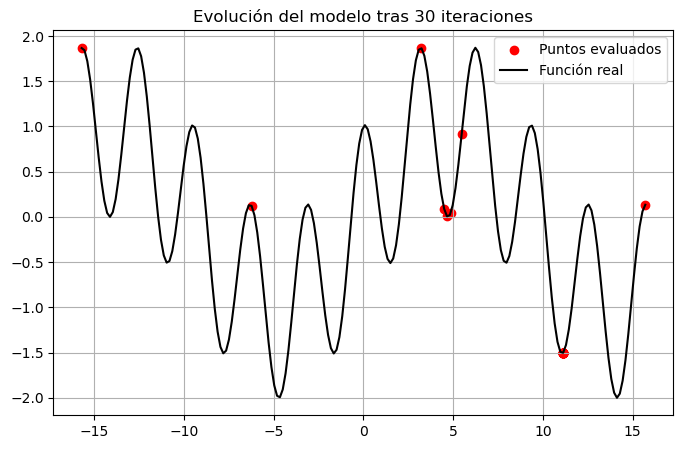

In [121]:
np.random.seed(14)

# Definimos nuestra función objetivo
def f(x):
    return np.sin(x/3) + np.cos(2*x)

# Datos iniciales
X = np.random.uniform(0, 2*np.pi, 3).reshape(-1, 1)
y = f(X)

# Definición del kernel y modelo
kernel = 1.0 * RBF(length_scale=1)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Rango de valores donde se evaluará la función
x_v = np.linspace(-5*np.pi, 5*np.pi, 200).reshape(-1, 1)

# Ciclo de 30 iteraciones
for i in range(30):
    # Entrenamos el modelo
    gp.fit(X, y)
    
    # Predicción en todo el rango
    y_pred, std = gp.predict(x_v, return_std=True)
    
    # Encontramos el punto con la predicción más alta
    indice_pred = np.argmin(y_pred)
    x_min_pred = x_v[indice_pred][0]
    
    # Calculamos el valor real en ese punto
    y_min = f(x_min_pred)
    
    # Agregamos el nuevo punto al conjunto de entrenamiento
    X = np.vstack([X, [[x_min_pred]]])
    y = np.vstack([y, [[y_min]]])

# Gráfico final
plt.figure(figsize=(8,5))
plt.scatter(X, y, color="red", label="Puntos evaluados")
plt.plot(x_v, f(x_v), color="black", label="Función real")
plt.grid(True)
plt.legend()
plt.title("Evolución del modelo tras 30 iteraciones")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

np.random.seed(14)

def f(x):
    return np.sin(x/3) + np.cos(2*x)

# datos iniciales
X = np.random.uniform(0, 2*np.pi, 3).reshape(-1, 1)
y = f(X)

kernel = 1.0 * RBF(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-10)

x_v = np.linspace(-5*np.pi, 5*np.pi, 200).reshape(-1, 1)

kappa = 1.96  # mayor -> más exploración
tol = 1e-6

for i in range(30):
    gp.fit(X, y.ravel())
    mu, std = gp.predict(x_v, return_std=True)
    ucb = mu + kappa * std

    # ordenar índices por UCB descendente y elegir el primero no duplicado
    sorted_idx = np.argsort(ucb)[::-1]
    chosen_idx = None
    for idx in sorted_idx:
        x_cand = x_v[idx, 0]
        # comprobar duplicados (en X)
        if not np.any(np.isclose(X.ravel(), x_cand, atol=tol)):
            chosen_idx = idx
            break
    if chosen_idx is None:
        # Si todos son duplicados (muy improbable), romper
        print("No hay candidato distinto. Rompiendo.")
        break

    x_max_pred = x_v[chosen_idx, 0]
    y_max = f(x_max_pred)

    # apilar nuevo punto
    X = np.vstack([X, [[x_max_pred]]])
    y = np.vstack([y, [[y_max]]])

# gráfico final
plt.figure(figsize=(8,5))
plt.plot(x_v, f(x_v), label="Función real")
plt.plot(x_v, gp.predict(x_v), label="GP mean (final)")
plt.scatter(X, y, color="red", label="Puntos evaluados")
plt.grid(True); plt.legend(); plt.title("Resultados tras 30 iteraciones (UCB)")
plt.show()


C:\Users\Admin\Documents\Programas\ANACONDA\N\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\Documents\Programas\ANACONDA\N\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\Documents\Programas\ANACONDA\N\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the da

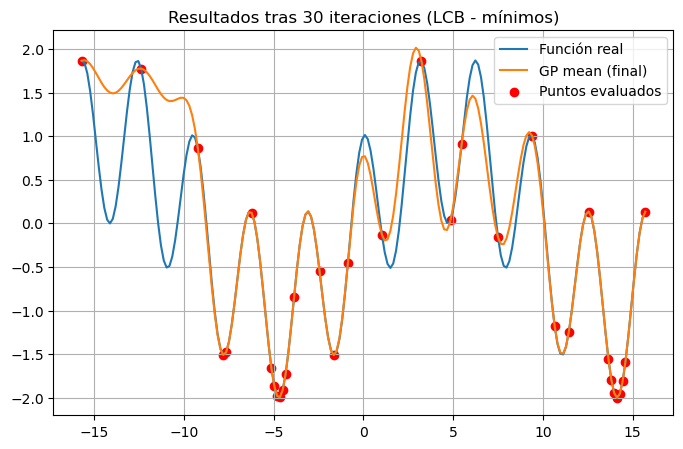

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

np.random.seed(14)

def f(x):
    return np.sin(x/3) + np.cos(2*x)

# Datos iniciales
X = np.random.uniform(0, 2*np.pi, 3).reshape(-1, 1)
y = f(X)

kernel = 1.0 * RBF(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-10)

x_v = np.linspace(-5*np.pi, 5*np.pi, 200).reshape(-1, 1)

kappa = 1.96  # controla el equilibrio exploración/explotación
tol = 1e-6

for i in range(30):
    gp.fit(X, y.ravel())
    mu, std = gp.predict(x_v, return_std=True)
    
    # Ahora buscamos el mínimo → usamos Lower Confidence Bound (LCB)
    lcb = mu - kappa * std
    
    # Ordenar índices de menor a mayor (porque buscamos el mínimo)
    sorted_idx = np.argsort(lcb)
    chosen_idx = None
    for idx in sorted_idx:
        x_cand = x_v[idx, 0]
        if not np.any(np.isclose(X.ravel(), x_cand, atol=tol)):
            chosen_idx = idx
            break
    if chosen_idx is None:
        print("No hay candidato distinto. Rompiendo.")
        break

    x_min_pred = x_v[chosen_idx, 0]
    y_min = f(x_min_pred)

    # Agregar nuevo punto
    X = np.vstack([X, [[x_min_pred]]])
    y = np.vstack([y, [[y_min]]])

# Gráfico final
plt.figure(figsize=(8,5))
plt.plot(x_v, f(x_v), label="Función real")
plt.plot(x_v, gp.predict(x_v), label="GP mean (final)")
plt.scatter(X, y, color="red", label="Puntos evaluados")
plt.grid(True); plt.legend(); plt.title("Resultados tras 30 iteraciones (LCB - mínimos)")
plt.show()


Profe aquí le entrego la tarea de optimización. 

Mire le seré muy honesto.
La verdad que al principio no me hacían mucho sentido las gráficas donde ibamos colocando un punto nuevo en cada predicción máxima y mínima. La primera gráfica la hice yo más o menos con la misma lógica de la desviación estándar máxima. Lo que llegué a pensar, junto con la gráfica que me arrojó el código fue que, a pesar de que se vaya reiterando en el for, siempre se tendrá el mismo valor de predicción máxima. Esto lo pensé porque me arrojó el mismo valor consecutivas veces, y supuse que este no cambiaba.
Sin embargo, para el caso del mínimo fue diferente, ya que aquí sí que se iba tomando un valor diferente, bueno en algunos casos, porque a diferencia del primer for con las 30 repeticiones ahí si se pudieron ver los 30 puntos, pero ahora ya no los veo así.

Ya después de pensarle un rato chat me ayudó con una función de Upper Confidence Bound (UCB), la cual al parecer toma acq(x) = mu(x) + kappa * sigma(x). Con esto mezcla explotación (mu) y exploración (sigma). La verdad que no se si esté bien así, pero a lo que entendí esta función hace como un equilibrio entre tomar la media esperada y la desviación y de ahí se genera el punto máximo. La verdad que las gráficas que me arrojó se ven un tal más coherentes, pero igual quiero comprenderlo mejor para poder hacerlo yo solo